### Load the dataset

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('employees_original.csv', on_bad_lines='skip')
df

,name,age,department,salary,start_date,email
0,Ana,25,Sales,$50000,2020-01-15,ANA@example.com
1,Ben,,Marketing,45000,15/02/2020,ben@example.com
2,Ana,25,Sales,$50000,2020-01-15,ana@example.com
3,Cara,29,Finance,$120000,2021/03/01,cara@example.com
4,D. Silva,34,Sales,NaN,2020-07-10,dsilva@EXAMPLE.COM
5,Eve,58,HR,$1000000,01-04-2019,eve@example
6,Frank,22,Marketing,$38500,2018-12-01,frank@example.com
7,NaN,30,Ops,$40000,2019-05-20,missingname@example.com


In [61]:
df0 = df.copy()

### 1. Inspect

In [62]:
print(df.shape)

(8, 6)


In [63]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        7 non-null      object
 1   age         8 non-null      object
 2   department  8 non-null      object
 3   salary      7 non-null      object
 4   start_date  8 non-null      object
 5   email       8 non-null      object
dtypes: object(6)
memory usage: 516.0+ bytes
None


In [64]:
print(df.head(8))

       name age department    salary  start_date                    email
0      Ana   25      Sales    $50000  2020-01-15          ANA@example.com
1       Ben      Marketing     45000  15/02/2020          ben@example.com
2       Ana  25      Sales    $50000  2020-01-15          ana@example.com
3      Cara  29    Finance   $120000  2021/03/01         cara@example.com
4  D. Silva  34      Sales       NaN  2020-07-10       dsilva@EXAMPLE.COM
5       Eve  58         HR  $1000000  01-04-2019              eve@example
6     Frank  22  Marketing    $38500  2018-12-01        frank@example.com
7       NaN  30        Ops    $40000  2019-05-20  missingname@example.com


In [65]:
df.isna().sum()

name          1
age           0
department    0
salary        1
start_date    0
email         0
dtype: int64

### 2. Trim whitespace in string columns

In [66]:
str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda s: s.str.strip())

### 3. Standardize case for emails, names

In [67]:
df['email'] = df['email'].str.lower()
df['name'] = df['name'].str.title() 
df

,name,age,department,salary,start_date,email
0,Ana,25,Sales,$50000,2020-01-15,ana@example.com
1,Ben,,Marketing,45000,15/02/2020,ben@example.com
2,Ana,25,Sales,$50000,2020-01-15,ana@example.com
3,Cara,29,Finance,$120000,2021/03/01,cara@example.com
4,D. Silva,34,Sales,NaN,2020-07-10,dsilva@example.com
5,Eve,58,HR,$1000000,01-04-2019,eve@example
6,Frank,22,Marketing,$38500,2018-12-01,frank@example.com
7,NaN,30,Ops,$40000,2019-05-20,missingname@example.com


### 4. Convert salary to numeric (remove $ and commas)

In [68]:
df['salary'] = df['salary'].astype(str).str.replace(r'[\$,]', '', regex=True)
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')
df

,name,age,department,salary,start_date,email
0,Ana,25,Sales,50000.0,2020-01-15,ana@example.com
1,Ben,,Marketing,45000.0,15/02/2020,ben@example.com
2,Ana,25,Sales,50000.0,2020-01-15,ana@example.com
3,Cara,29,Finance,120000.0,2021/03/01,cara@example.com
4,D. Silva,34,Sales,NaN,2020-07-10,dsilva@example.com
5,Eve,58,HR,1000000.0,01-04-2019,eve@example
6,Frank,22,Marketing,38500.0,2018-12-01,frank@example.com
7,NaN,30,Ops,40000.0,2019-05-20,missingname@example.com


### 5. Convert start_date to datetime (handle multiple formats)

In [69]:
df['start_date']

0    2020-01-15
1    15/02/2020
2    2020-01-15
3    2021/03/01
4    2020-07-10
5    01-04-2019
6    2018-12-01
7    2019-05-20
Name: start_date, dtype: object

In [70]:
# Function to detect separator and format
def standardize_date(date_str):
    if pd.isna(date_str):
        return None
    
    # Detect separator
    if '-' in date_str:
        sep = '-'
    elif '/' in date_str:
        sep = '/'
    else:
        return None  # Unknown format
    
    # Split components
    parts = date_str.split(sep)
    
    # Decide order: check if first part > 31 -> probably year
    if int(parts[0]) > 31:
        # Format: YYYY-MM-DD
        year, month, day = parts
    else:
        # Format: DD/MM/YYYY or DD-MM-YYYY
        day, month, year = parts
    
    # Return uniform format YYYY-MM-DD
    return f'{year.zfill(4)}-{month.zfill(2)}-{day.zfill(2)}'

In [71]:
df

,name,age,department,salary,start_date,email
0,Ana,25,Sales,50000.0,2020-01-15,ana@example.com
1,Ben,,Marketing,45000.0,15/02/2020,ben@example.com
2,Ana,25,Sales,50000.0,2020-01-15,ana@example.com
3,Cara,29,Finance,120000.0,2021/03/01,cara@example.com
4,D. Silva,34,Sales,NaN,2020-07-10,dsilva@example.com
5,Eve,58,HR,1000000.0,01-04-2019,eve@example
6,Frank,22,Marketing,38500.0,2018-12-01,frank@example.com
7,NaN,30,Ops,40000.0,2019-05-20,missingname@example.com


In [72]:
df['start_date'] = df['start_date'].apply(standardize_date)
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

df

,name,age,department,salary,start_date,email
0,Ana,25,Sales,50000.0,2020-01-15,ana@example.com
1,Ben,,Marketing,45000.0,2020-02-15,ben@example.com
2,Ana,25,Sales,50000.0,2020-01-15,ana@example.com
3,Cara,29,Finance,120000.0,2021-03-01,cara@example.com
4,D. Silva,34,Sales,NaN,2020-07-10,dsilva@example.com
5,Eve,58,HR,1000000.0,2019-04-01,eve@example
6,Frank,22,Marketing,38500.0,2018-12-01,frank@example.com
7,NaN,30,Ops,40000.0,2019-05-20,missingname@example.com


### 6. Handle missing values

Age: fill with mean

In [73]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
mean_age = round(df['age'].mean(skipna=True))
df['age'] = df['age'].fillna(mean_age)
df

,name,age,department,salary,start_date,email
0,Ana,25.0,Sales,50000.0,2020-01-15,ana@example.com
1,Ben,32.0,Marketing,45000.0,2020-02-15,ben@example.com
2,Ana,25.0,Sales,50000.0,2020-01-15,ana@example.com
3,Cara,29.0,Finance,120000.0,2021-03-01,cara@example.com
4,D. Silva,34.0,Sales,NaN,2020-07-10,dsilva@example.com
5,Eve,58.0,HR,1000000.0,2019-04-01,eve@example
6,Frank,22.0,Marketing,38500.0,2018-12-01,frank@example.com
7,NaN,30.0,Ops,40000.0,2019-05-20,missingname@example.com


Salary: fill with mean

In [74]:
# Convert salary to numeric and overwrite original df
df.loc[:, 'salary'] = pd.to_numeric(df['salary'], errors='coerce')

# Fill missing values
mean_salary = df['salary'].mean()
df.loc[:, 'salary'] = df['salary'].fillna(mean_salary)
df

,name,age,department,salary,start_date,email
0,Ana,25.0,Sales,50000.000000,2020-01-15,ana@example.com
1,Ben,32.0,Marketing,45000.000000,2020-02-15,ben@example.com
2,Ana,25.0,Sales,50000.000000,2020-01-15,ana@example.com
3,Cara,29.0,Finance,120000.000000,2021-03-01,cara@example.com
4,D. Silva,34.0,Sales,191928.571429,2020-07-10,dsilva@example.com
5,Eve,58.0,HR,1000000.000000,2019-04-01,eve@example
6,Frank,22.0,Marketing,38500.000000,2018-12-01,frank@example.com
7,NaN,30.0,Ops,40000.000000,2019-05-20,missingname@example.com


### 7. Remove exact duplicate rows

In [75]:
df = df.drop_duplicates()
df

,name,age,department,salary,start_date,email
0,Ana,25.0,Sales,50000.000000,2020-01-15,ana@example.com
1,Ben,32.0,Marketing,45000.000000,2020-02-15,ben@example.com
3,Cara,29.0,Finance,120000.000000,2021-03-01,cara@example.com
4,D. Silva,34.0,Sales,191928.571429,2020-07-10,dsilva@example.com
5,Eve,58.0,HR,1000000.000000,2019-04-01,eve@example
6,Frank,22.0,Marketing,38500.000000,2018-12-01,frank@example.com
7,NaN,30.0,Ops,40000.000000,2019-05-20,missingname@example.com


### 8. Remove duplicates by keys (e.g., name + start_date) keeping first

In [76]:
df = df.drop_duplicates(subset=['name','start_date'])
df

,name,age,department,salary,start_date,email
0,Ana,25.0,Sales,50000.000000,2020-01-15,ana@example.com
1,Ben,32.0,Marketing,45000.000000,2020-02-15,ben@example.com
3,Cara,29.0,Finance,120000.000000,2021-03-01,cara@example.com
4,D. Silva,34.0,Sales,191928.571429,2020-07-10,dsilva@example.com
5,Eve,58.0,HR,1000000.000000,2019-04-01,eve@example
6,Frank,22.0,Marketing,38500.000000,2018-12-01,frank@example.com
7,NaN,30.0,Ops,40000.000000,2019-05-20,missingname@example.com


### 9. Flag outliers in salary using IQR

In [77]:
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df['salary_outlier'] = ((df['salary'] < lower) | (df['salary'] > upper))
df

,name,age,department,salary,start_date,email,salary_outlier
0,Ana,25.0,Sales,50000.000000,2020-01-15,ana@example.com,False
1,Ben,32.0,Marketing,45000.000000,2020-02-15,ben@example.com,False
3,Cara,29.0,Finance,120000.000000,2021-03-01,cara@example.com,False
4,D. Silva,34.0,Sales,191928.571429,2020-07-10,dsilva@example.com,False
5,Eve,58.0,HR,1000000.000000,2019-04-01,eve@example,True
6,Frank,22.0,Marketing,38500.000000,2018-12-01,frank@example.com,False
7,NaN,30.0,Ops,40000.000000,2019-05-20,missingname@example.com,False


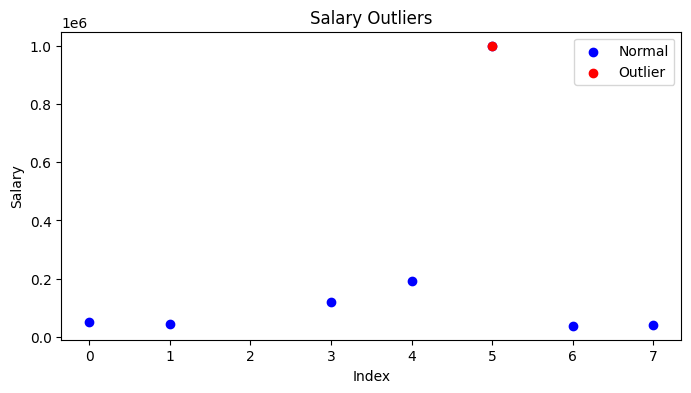

In [78]:
plt.figure(figsize=(8, 4))
plt.scatter(df.index, df['salary'], color='blue', label='Normal')
plt.scatter(df.index[df['salary_outlier']], 
            df['salary'][df['salary_outlier']], 
            color='red', label='Outlier')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.title('Salary Outliers')
plt.legend()
plt.show()

### 10. Basic email validation using RegEx

In [79]:
df['email_valid'] = df['email'].str.contains(r'^[^@]+@[^@]+\.[^@]+$', regex=True)
df

,name,age,department,salary,start_date,email,salary_outlier,email_valid
0,Ana,25.0,Sales,50000.000000,2020-01-15,ana@example.com,False,True
1,Ben,32.0,Marketing,45000.000000,2020-02-15,ben@example.com,False,True
3,Cara,29.0,Finance,120000.000000,2021-03-01,cara@example.com,False,True
4,D. Silva,34.0,Sales,191928.571429,2020-07-10,dsilva@example.com,False,True
5,Eve,58.0,HR,1000000.000000,2019-04-01,eve@example,True,False
6,Frank,22.0,Marketing,38500.000000,2018-12-01,frank@example.com,False,True
7,NaN,30.0,Ops,40000.000000,2019-05-20,missingname@example.com,False,True


### 11. Drop rows missing required keys

In [80]:
df = df[df['name'].notna() & (df['name'] != '')]
df

,name,age,department,salary,start_date,email,salary_outlier,email_valid
0,Ana,25.0,Sales,50000.000000,2020-01-15,ana@example.com,False,True
1,Ben,32.0,Marketing,45000.000000,2020-02-15,ben@example.com,False,True
3,Cara,29.0,Finance,120000.000000,2021-03-01,cara@example.com,False,True
4,D. Silva,34.0,Sales,191928.571429,2020-07-10,dsilva@example.com,False,True
5,Eve,58.0,HR,1000000.000000,2019-04-01,eve@example,True,False
6,Frank,22.0,Marketing,38500.000000,2018-12-01,frank@example.com,False,True


### 12. Save cleaned file

In [81]:
df.to_csv('employees_cleaned.csv', index=False)

### 13. Full pipeline

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from typing import Optional, List, Tuple


class DataCleaningPipeline:
    """
    A comprehensive data cleaning pipeline for employee data.
    
    This pipeline handles:
    - Text normalization (trimming, case standardization)
    - Data type conversions (salary, dates)
    - Missing value imputation
    - Duplicate removal
    - Outlier detection
    - Data validation (email format)
    """
    
    def __init__(self, input_file: str, output_file: str = "output.csv"):
        self.input_file = input_file
        self.output_file = output_file
        self.df = None
        self.original_df = None
        
    def load_data(self) -> pd.DataFrame:
        """Load the dataset and keep a copy of the original."""
        print("Loading dataset...")
        self.df = pd.read_csv(self.input_file, on_bad_lines='skip')
        self.original_df = self.df.copy()
        print(f"Loaded {len(self.df)} records with {len(self.df.columns)} columns")
        return self.df
    
    def trim_whitespace(self) -> pd.DataFrame:
        """Remove leading and trailing whitespace from string columns."""
        print("\n=== TRIMMING WHITESPACE ===")
        str_cols = self.df.select_dtypes(include='object').columns
        self.df[str_cols] = self.df[str_cols].apply(lambda s: s.str.strip())
        print(f"Trimmed whitespace from {len(str_cols)} string columns")
        return self.df
    
    def standardize_case(self) -> pd.DataFrame:
        """Standardize case for emails (lowercase) and names (title case)."""
        print("\n=== STANDARDIZING CASE ===")
        if 'email' in self.df.columns:
            self.df['email'] = self.df['email'].str.lower()
            print("Converted emails to lowercase")
        
        if 'name' in self.df.columns:
            self.df['name'] = self.df['name'].str.title()
            print("Converted names to title case")
        
        return self.df
    
    def clean_salary(self) -> pd.DataFrame:
        """Convert salary to numeric format by removing $ and commas."""
        print("\n=== CLEANING SALARY DATA ===")
        if 'salary' in self.df.columns:
            # Remove $ and commas, convert to numeric
            self.df['salary'] = self.df['salary'].astype(str).str.replace(r'[\\$,]', '', regex=True)
            self.df['salary'] = pd.to_numeric(self.df['salary'], errors='coerce')
            print("Converted salary to numeric format")
        return self.df
    
    def standardize_dates(self) -> pd.DataFrame:
        """Standardize date formats and convert to datetime."""
        print("\n=== STANDARDIZING DATES ===")
        
        def standardize_date(date_str):
            """Convert various date formats to YYYY-MM-DD."""
            if pd.isna(date_str):
                return None
            
            # Detect separator
            if '-' in date_str:
                sep = '-'
            elif '/' in date_str:
                sep = '/'
            else:
                return None
            
            # Split components
            parts = date_str.split(sep)
            
            # Decide order: check if first part > 31 -> probably year
            if int(parts[0]) > 31:
                # Format: YYYY-MM-DD or YYYY/MM/DD
                year, month, day = parts
            else:
                # Format: DD/MM/YYYY or DD-MM-YYYY
                day, month, year = parts
            
            # Return uniform format YYYY-MM-DD
            return f'{year.zfill(4)}-{month.zfill(2)}-{day.zfill(2)}'
        
        if 'start_date' in self.df.columns:
            self.df['start_date'] = self.df['start_date'].apply(standardize_date)
            self.df['start_date'] = pd.to_datetime(self.df['start_date'], errors='coerce')
            print("Standardized date formats and converted to datetime")
        
        return self.df
    
    def handle_missing_values(self) -> pd.DataFrame:
        """Fill missing values with appropriate strategies."""
        print("\n=== HANDLING MISSING VALUES ===")
        
        # Fill missing age with mean
        if 'age' in self.df.columns:
            self.df['age'] = pd.to_numeric(self.df['age'], errors='coerce')
            mean_age = round(self.df['age'].mean(skipna=True))
            before_count = self.df['age'].isna().sum()
            self.df['age'] = self.df['age'].fillna(mean_age)
            print(f"Filled {before_count} missing age values with mean: {mean_age}")
        
        # Fill missing salary with mean
        if 'salary' in self.df.columns:
            self.df['salary'] = pd.to_numeric(self.df['salary'], errors='coerce')
            mean_salary = self.df['salary'].mean()
            before_count = self.df['salary'].isna().sum()
            self.df['salary'] = self.df['salary'].fillna(mean_salary)
            print(f"Filled {before_count} missing salary values with mean: ${mean_salary:.2f}")
        
        return self.df
    
    def remove_duplicates(self) -> pd.DataFrame:
        """Remove duplicate records."""
        print("\n=== REMOVING DUPLICATES ===")
        
        # Remove exact duplicates
        before_exact = len(self.df)
        self.df = self.df.drop_duplicates()
        exact_removed = before_exact - len(self.df)
        print(f"Removed {exact_removed} exact duplicate rows")
        
        # Remove duplicates based on key columns (name + start_date)
        key_cols = ['name', 'start_date']
        if all(col in self.df.columns for col in key_cols):
            before_key = len(self.df)
            self.df = self.df.drop_duplicates(subset=key_cols)
            key_removed = before_key - len(self.df)
            print(f"Removed {key_removed} duplicate rows based on key columns")
        
        return self.df
    
    def detect_outliers(self, column: str = 'salary') -> pd.DataFrame:
        """Detect outliers using IQR method and add flag column."""
        print(f"\n=== DETECTING OUTLIERS IN {column.upper()} ===")
        
        if column in self.df.columns:
            Q1 = self.df[column].quantile(0.25)
            Q3 = self.df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            
            outlier_col = f'{column}_outlier'
            self.df[outlier_col] = ((self.df[column] < lower) | (self.df[column] > upper))
            outlier_count = self.df[outlier_col].sum()
            print(f"Detected {outlier_count} outliers in {column}")
            print(f"Outlier bounds: < {lower:.2f} or > {upper:.2f}")
        
        return self.df
    
    def validate_emails(self) -> pd.DataFrame:
        """Validate email format using regex."""
        print("\n=== VALIDATING EMAIL ADDRESSES ===")
        
        if 'email' in self.df.columns:
            email_pattern = r'^[^@]+@[^@]+\.[^@]+$'
            self.df['email_valid'] = self.df['email'].str.contains(email_pattern, regex=True, na=False)
            invalid_count = (~self.df['email_valid']).sum()
            print(f"Found {invalid_count} invalid email addresses")
        
        return self.df
    
    def remove_incomplete_records(self, required_columns: List[str] = None) -> pd.DataFrame:
        """Remove rows with missing required data."""
        print("\n=== REMOVING INCOMPLETE RECORDS ===")
        
        if required_columns is None:
            required_columns = ['name']  # Default required column
        
        before_count = len(self.df)
        
        for col in required_columns:
            if col in self.df.columns:
                self.df = self.df[self.df[col].notna() & (self.df[col] != '')]
        
        removed_count = before_count - len(self.df)
        print(f"Removed {removed_count} records missing required data in columns: {required_columns}")
        
        return self.df
    
    def plot_outliers(self, column: str = 'salary') -> None:
        """Visualize outliers in the specified column."""
        outlier_col = f'{column}_outlier'
        
        if outlier_col in self.df.columns:
            plt.figure(figsize=(10, 6))
            
            # Plot normal values
            normal_mask = ~self.df[outlier_col]
            plt.scatter(self.df.index[normal_mask], self.df[column][normal_mask], 
                       color='blue', label='Normal', alpha=0.7)
            
            # Plot outliers
            outlier_mask = self.df[outlier_col]
            plt.scatter(self.df.index[outlier_mask], self.df[column][outlier_mask], 
                       color='red', label='Outlier', s=100, alpha=0.8)
            
            plt.xlabel('Record Index')
            plt.ylabel(column.title())
            plt.title(f'{column.title()} Outliers Detection')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.show()
    
    def generate_summary_report(self) -> None:
        """Generate a summary of the cleaning process."""
        print("\n" + "="*50)
        print("           CLEANING SUMMARY REPORT")
        print("="*50)
        
        original_shape = self.original_df.shape
        final_shape = self.df.shape
        
        print(f"Original dataset: {original_shape[0]} rows × {original_shape[1]} columns")
        print(f"Final dataset: {final_shape[0]} rows × {final_shape[1]} columns")
        print(f"Rows removed: {original_shape[0] - final_shape[0]}")
        print(f"Columns added: {final_shape[1] - original_shape[1]}")
        
        # Data quality metrics
        if 'salary_outlier' in self.df.columns:
            outlier_pct = (self.df['salary_outlier'].sum() / len(self.df)) * 100
            print(f"Salary outliers: {self.df['salary_outlier'].sum()} ({outlier_pct:.1f}%)")
        
        if 'email_valid' in self.df.columns:
            valid_email_pct = (self.df['email_valid'].sum() / len(self.df)) * 100
            print(f"Valid emails: {self.df['email_valid'].sum()} ({valid_email_pct:.1f}%)")
        
        # Missing values in final dataset
        missing_total = self.df.isna().sum().sum()
        print(f"Remaining missing values: {missing_total}")
        
        print("\nCleaning process completed successfully!")
    
    def save_data(self) -> None:
        """Save the cleaned dataset."""
        print(f"\n=== SAVING CLEANED DATA ===")
        self.df.to_csv(self.output_file, index=False)
        print(f"Cleaned dataset saved to: {self.output_file}")
    
    def run_full_pipeline(self, required_columns: List[str] = None, 
                         plot_outliers: bool = True) -> pd.DataFrame:
        """Run the complete data cleaning pipeline."""
        print("Starting comprehensive data cleaning pipeline...")
        print("="*60)
        
        # Load and inspect data
        self.load_data()

        # Execute cleaning steps
        self.trim_whitespace()
        self.standardize_case()
        self.clean_salary()
        self.standardize_dates()
        self.handle_missing_values()
        self.remove_duplicates()
        self.detect_outliers('salary')
        self.validate_emails()
        self.remove_incomplete_records(required_columns)
        
        # Generate visualizations and reports
        if plot_outliers and 'salary' in self.df.columns:
            self.plot_outliers('salary')
        
        self.generate_summary_report()
        self.save_data()
        
        return self.df

Starting comprehensive data cleaning pipeline...
Loading dataset...
Loaded 8 records with 6 columns

=== TRIMMING WHITESPACE ===
Trimmed whitespace from 6 string columns

=== STANDARDIZING CASE ===
Converted emails to lowercase
Converted names to title case

=== CLEANING SALARY DATA ===
Converted salary to numeric format

=== STANDARDIZING DATES ===
Standardized date formats and converted to datetime

=== HANDLING MISSING VALUES ===
Filled 1 missing age values with mean: 32
Filled 1 missing salary values with mean: $191928.57

=== REMOVING DUPLICATES ===
Removed 1 exact duplicate rows
Removed 0 duplicate rows based on key columns

=== DETECTING OUTLIERS IN SALARY ===
Detected 1 outliers in salary
Outlier bounds: < -127696.43 or > 326160.71

=== VALIDATING EMAIL ADDRESSES ===
Found 1 invalid email addresses

=== REMOVING INCOMPLETE RECORDS ===
Removed 1 records missing required data in columns: ['name']


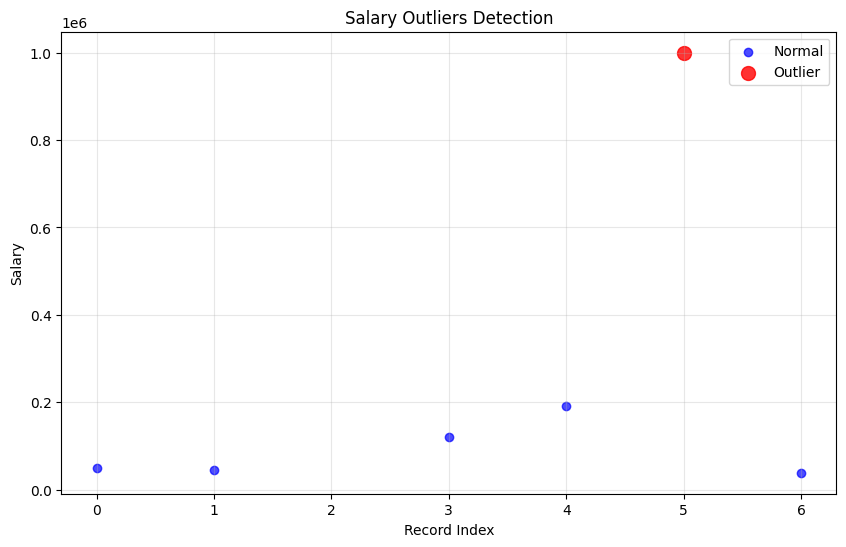


           CLEANING SUMMARY REPORT
Original dataset: 8 rows × 6 columns
Final dataset: 6 rows × 8 columns
Rows removed: 2
Columns added: 2
Salary outliers: 1 (16.7%)
Valid emails: 5 (83.3%)
Remaining missing values: 0

Cleaning process completed successfully!

=== SAVING CLEANED DATA ===
Cleaned dataset saved to: employees_cleaned2.csv

Final cleaned dataset:
       name   age department          salary start_date               email  \
0       Ana  25.0      Sales    50000.000000 2020-01-15     ana@example.com   
1       Ben  32.0  Marketing    45000.000000 2020-02-15     ben@example.com   
3      Cara  29.0    Finance   120000.000000 2021-03-01    cara@example.com   
4  D. Silva  34.0      Sales   191928.571429 2020-07-10  dsilva@example.com   
5       Eve  58.0         HR  1000000.000000 2019-04-01         eve@example   

   salary_outlier  email_valid  
0           False         True  
1           False         True  
3           False         True  
4           False         True

In [83]:
if __name__ == "__main__":
    # Initialize the pipeline
    pipeline = DataCleaningPipeline(
        input_file='employees_original.csv',
        output_file='employees_cleaned2.csv'
    )
    
    # Run the complete pipeline
    cleaned_data = pipeline.run_full_pipeline(
        required_columns=['name'],  # Specify required columns
        plot_outliers=True  # Generate outlier visualization
    )
    
    # Display final cleaned data
    print("\nFinal cleaned dataset:")
    print(cleaned_data.head())